In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def calculate_split_frenquency_bin(spectrogram, split_frequency, sample_rate):
    """
    计算分割频率对应的频率 bin 索引

    参数：
    spectrogram (numpy.ndarray): 输入的频谱图，形状为 (n_freq_bins, n_time_frames)
    split_frequency (float): 分裂频率，单位为 Hz
    sample_rate (int): 音频采样率

    返回：
    int: 分裂频率对应的频率 bin 索引
    """
    frequency_range = sample_rate / 2
    # 每个频率仓的间隔
    frequency_delta_per_bin = frequency_range / spectrogram.shape[0]
    split_frequency_bin = np.floor((split_frequency / frequency_delta_per_bin)).astype(int)
    return split_frequency_bin


In [14]:
def calculate_band_energy_ratio(spectrogram, split_frequency_bin, sample_rate):
    """
    计算频带能量比（Band Energy Ratio）

    参数：
    spectrogram (numpy.ndarray): 输入的频谱图，形状为 (n_freq_bins, n_time_frames)
    split_frequency_bin (int): 分裂频率 bin 的索引
    sample_rate (int): 音频采样率

    返回：
    numpy.ndarray: 计算得到的带能量比，形状为 (n_time_frames,)
    """
    split_frequency_bin = calculate_split_frenquency_bin(spectrogram, split_frequency_bin, sample_rate)

    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T

    band_energy = []

    for frequency_in_frame in power_spectrogram:
        sum_power_low_frequency = np.sum(frequency_in_frame[:split_frequency_bin])
        sum_power_high_frequency = np.sum(frequency_in_frame[split_frequency_bin:])
        band_energy.append(sum_power_low_frequency / sum_power_high_frequency)

    return np.array(band_energy)

    

In [15]:
# 音频文件路径
audio_file = r'D:\数据集\shipsEar_AUDIOS\6__10_07_13_marDeCangas_Entra.wav'

waveform, sample_rate = librosa.load(audio_file, sr=22050)

frame_length = 2048
hop_length = 512

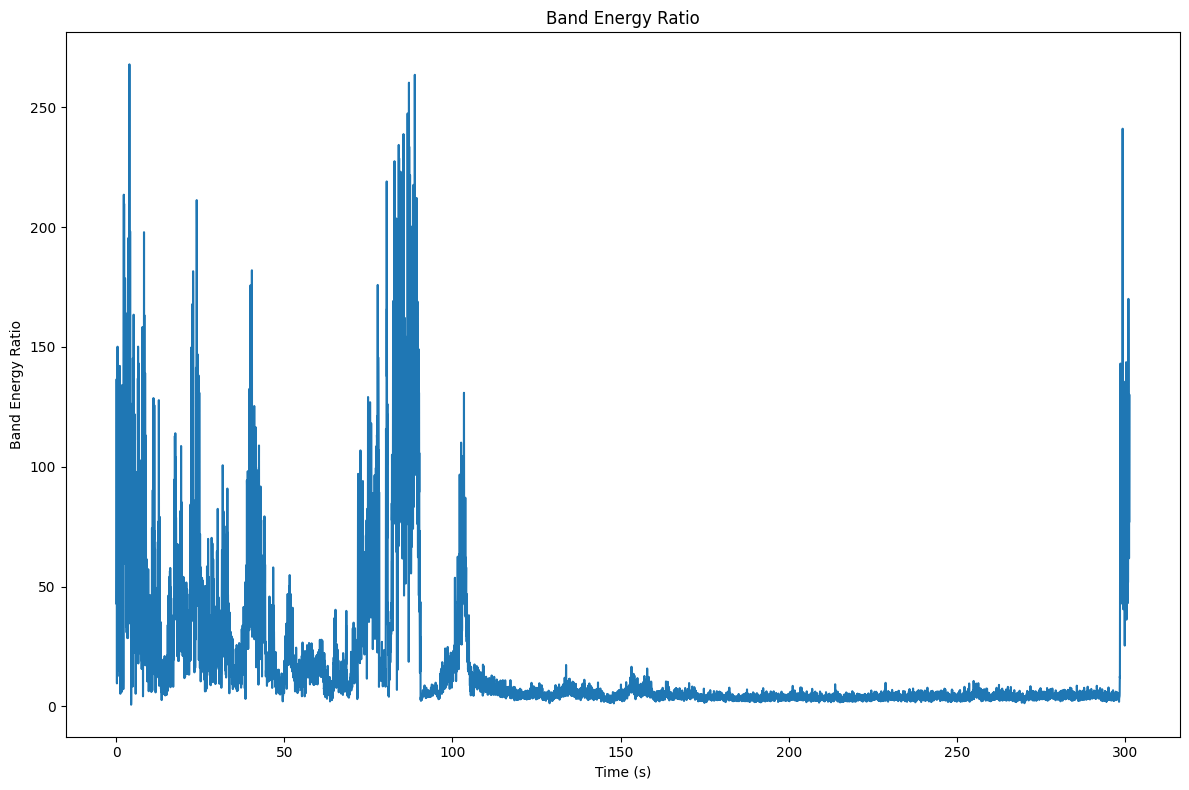

In [27]:
waveforms_stft_librosa = librosa.stft(waveform, n_fft=frame_length, hop_length=hop_length)
ber = calculate_band_energy_ratio(waveforms_stft_librosa,2000, sample_rate)

frame = len(ber)
t = librosa.frames_to_time(np.arange(frame), sr=sample_rate, hop_length=hop_length)
plt.figure(figsize=(12, 8))
plt.plot(t, ber)
plt.xlabel('Time (s)')
plt.ylabel('Band Energy Ratio')
plt.title('Band Energy Ratio')
plt.tight_layout()
plt.show()